In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving medical.csv to medical.csv
User uploaded file "medical.csv" with length 55628 bytes


In [ ]:
medical= pd.read_csv('/content/medical.csv')


In [ ]:

X = medical.iloc[:, [2,5]]

In [ ]:
Y = medical.iloc[:,6]

In [ ]:
medical['children'].replace(['smoker', 'age'], [0, 1], inplace=True)

<Axes: >

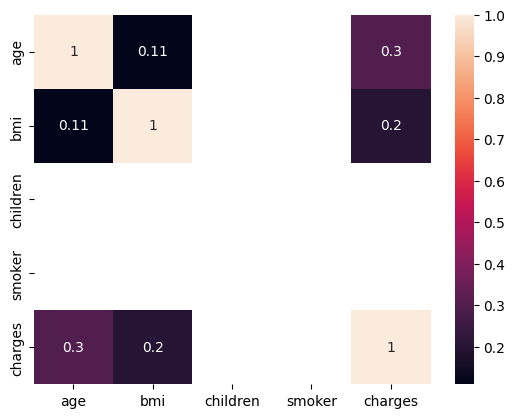

In [ ]:
medical['children'] = medical['children'].map({'male': 0, 'female': 1})
medical['smoker'] = medical['age'].map({'yes': 1, 'no': 0})

# Drop non-numerical columns before calculating correlation
numerical_data = medical.select_dtypes(include=['number'])

# Calculate correlation matrix and generate heatmap
sns.heatmap(numerical_data.corr(), annot=True)


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state =0)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'medical' is your DataFrame
# ... (Your previous code to load and preprocess 'medical')

# Select only numerical columns for scaling
numerical_columns = ['age', 'bmi', 'children', 'charges']  # Add other numerical columns
X = medical[numerical_columns]
Y = medical['smoker']  # Or whatever your target variable is

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

# Create a StandardScaler object
sc_X = StandardScaler()

# Fit the scaler to your training data and transform it
X_train = sc_X.fit_transform(X_train)

# Transform your test data using the same scaler
X_test = sc_X.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import pandas as pd

# Example data (replace with your actual data)
X_train = [[1, 2], [np.nan, 3], [7, 6]]
X_test = [[4, np.nan], [8, 9]]
Y_train = [1, np.nan, 0]

# Create an imputer to fill missing values in features with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Check if Y_train has missing values before imputation
if pd.isnull(Y_train).any():
    imputer_y = SimpleImputer(strategy='most_frequent')
    Y_train = imputer_y.fit_transform(pd.DataFrame(Y_train))  # Impute Y_train
    Y_train = Y_train.ravel()  # Flatten the array
else:
    print("No missing values in Y_train")

# Now, fit the logistic regression model
LogR = LogisticRegression(random_state=0)
LogR.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(random_state=0)
LogR.fit(X_train, Y_train)  # Fit the model to the training data

y_pred = LogR.predict(X_test)  # Now you can predict
y_pred

array([0., 0.])

<ipython-input-17-ffd99c6deda2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


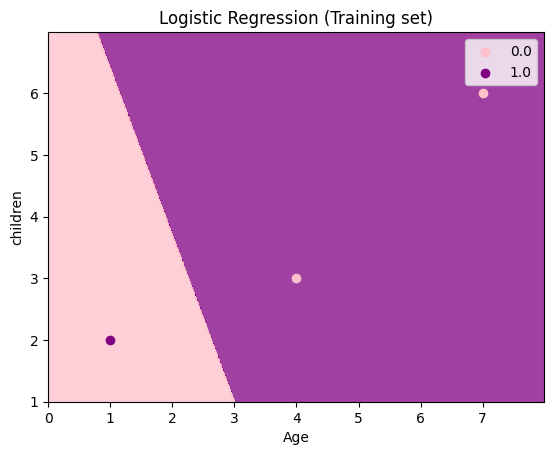

In [ ]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step =0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step =0.01))
plt.contourf(X1, X2, LogR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('pink', 'purple'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('children')
plt.legend()
plt.show()